In [2]:
import json
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import folium
import datetime

from pandas import json_normalize

- channelGrouping : 유입 경로
- date : 방문 날짜
- device : 사용자 장치 정보
    - browser
    - browserVersion
    - browserSize
    - operatingSystem
    - operatingSystemVersion
    - isMobile : T/F
    - mobileDeviceBranding
    - mobileDeviceModel
    - mobileInputSelector
    - mobileDeviceInfo
    - mobileDeviceMarketingName
    - flashVersion
    - language
    - screenColors
    - screenResolution
    - deviceCategory
- fullVisitorId : 사용자 고유 식별자
- geoNetwork : 사용자 위치 정보
    - continent
    - subContinent
    - country
    - region
    - metro
    - city
    - cityId
    - networkDomain
    - latitude
    - longitude
    - networkLocation
- sessionId : fullVisitorId + visitId
- socialEngagementType : 참여 유형
- totals : 세션 전체 집계값(?)
    - visits
    - hits
    - pageviews
    - bounces
    - newVisits
- trafficSource : 유입 트래픽 소스
    - campaign
    - source
    - medium
    - keyword
    - adwordsClickInfo
        - criteriaParameters
    - isTrueDirect
- visitId : 식별자
- visitNumber : 세션 번호
- visitStartTime : 타임스탬프, visitId와 동일

In [3]:
# 'device', 'geoNetwork', 'totals', 'trafficSource’ 컬럼 추출
json_columns = ['device', 'geoNetwork','totals', 'trafficSource']

def load_dataframe(csv_path):
    path = csv_path
    df = pd.read_csv(path, converters={column: json.loads for column in json_columns}, 
                     dtype={'fullVisitorId': 'str'})
   
    for column in json_columns:
        column_as_df = json_normalize(df[column])
        column_as_df.columns = [f"{column}_{subcolumn}" for subcolumn in column_as_df.columns]
        df = df.drop(column, axis=1).merge(column_as_df, right_index=True, left_index=True)

    return df

In [4]:
train = load_dataframe('C:/Users/USER/OneDrive/바탕 화면/내일배움캠프 데이터 분석/train.csv/train.csv')

In [5]:
train.head(3)

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device_browser,device_browserVersion,...,trafficSource_adwordsClickInfo.criteriaParameters,trafficSource_isTrueDirect,trafficSource_referralPath,trafficSource_adwordsClickInfo.page,trafficSource_adwordsClickInfo.slot,trafficSource_adwordsClickInfo.gclId,trafficSource_adwordsClickInfo.adNetworkType,trafficSource_adwordsClickInfo.isVideoAd,trafficSource_adContent,trafficSource_campaignCode
0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385,Chrome,not available in demo dataset,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1472880147,Firefox,not available in demo dataset,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386,Chrome,not available in demo dataset,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
train.columns

Index(['channelGrouping', 'date', 'fullVisitorId', 'sessionId',
       'socialEngagementType', 'visitId', 'visitNumber', 'visitStartTime',
       'device_browser', 'device_browserVersion', 'device_browserSize',
       'device_operatingSystem', 'device_operatingSystemVersion',
       'device_isMobile', 'device_mobileDeviceBranding',
       'device_mobileDeviceModel', 'device_mobileInputSelector',
       'device_mobileDeviceInfo', 'device_mobileDeviceMarketingName',
       'device_flashVersion', 'device_language', 'device_screenColors',
       'device_screenResolution', 'device_deviceCategory',
       'geoNetwork_continent', 'geoNetwork_subContinent', 'geoNetwork_country',
       'geoNetwork_region', 'geoNetwork_metro', 'geoNetwork_city',
       'geoNetwork_cityId', 'geoNetwork_networkDomain', 'geoNetwork_latitude',
       'geoNetwork_longitude', 'geoNetwork_networkLocation', 'totals_visits',
       'totals_hits', 'totals_pageviews', 'totals_bounces', 'totals_newVisits',
       'totals_t

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 55 columns):
 #   Column                                             Non-Null Count   Dtype 
---  ------                                             --------------   ----- 
 0   channelGrouping                                    903653 non-null  object
 1   date                                               903653 non-null  int64 
 2   fullVisitorId                                      903653 non-null  object
 3   sessionId                                          903653 non-null  object
 4   socialEngagementType                               903653 non-null  object
 5   visitId                                            903653 non-null  int64 
 6   visitNumber                                        903653 non-null  int64 
 7   visitStartTime                                     903653 non-null  int64 
 8   device_browser                                     903653 non-null  object
 9   devi

In [8]:
device = train[['device_browser', 'device_browserVersion', 'device_browserSize',
       'device_operatingSystem', 'device_operatingSystemVersion',
       'device_isMobile', 'device_mobileDeviceBranding',
       'device_mobileDeviceModel', 'device_mobileInputSelector',
       'device_mobileDeviceInfo', 'device_mobileDeviceMarketingName',
       'device_flashVersion', 'device_language', 'device_screenColors',
       'device_screenResolution', 'device_deviceCategory']]
device.head(3)

,device_browser,device_browserVersion,device_browserSize,device_operatingSystem,device_operatingSystemVersion,device_isMobile,device_mobileDeviceBranding,device_mobileDeviceModel,device_mobileInputSelector,device_mobileDeviceInfo,device_mobileDeviceMarketingName,device_flashVersion,device_language,device_screenColors,device_screenResolution,device_deviceCategory
0,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
1,Firefox,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
2,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop


In [9]:
device.describe(include='all')

,device_browser,device_browserVersion,device_browserSize,device_operatingSystem,device_operatingSystemVersion,device_isMobile,device_mobileDeviceBranding,device_mobileDeviceModel,device_mobileInputSelector,device_mobileDeviceInfo,device_mobileDeviceMarketingName,device_flashVersion,device_language,device_screenColors,device_screenResolution,device_deviceCategory
count,903653,903653,903653,903653,903653,903653,903653,903653,903653,903653,903653,903653,903653,903653,903653,903653
unique,54,1,1,20,1,2,1,1,1,1,1,1,1,1,1,3
top,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
freq,620364,903653,903653,350072,903653,664530,903653,903653,903653,903653,903653,903653,903653,903653,903653,664479


In [10]:
totals = train[['totals_visits',
       'totals_hits', 'totals_pageviews', 'totals_bounces', 'totals_newVisits',
       'totals_transactionRevenue']]
totals.head(3)

,totals_visits,totals_hits,totals_pageviews,totals_bounces,totals_newVisits,totals_transactionRevenue
0,1,1,1,1,1,NaN
1,1,1,1,1,1,NaN
2,1,1,1,1,1,NaN


In [11]:
totals.describe(include='all')

,totals_visits,totals_hits,totals_pageviews,totals_bounces,totals_newVisits,totals_transactionRevenue
count,903653,903653,903553,450630,703060,11515
unique,1,274,213,1,1,5332
top,1,1,1,1,1,16990000
freq,903653,446754,452522,450630,703060,256


In [12]:
trafficSource = train[['trafficSource_campaign',
       'trafficSource_source', 'trafficSource_medium', 'trafficSource_keyword',
       'trafficSource_adwordsClickInfo.criteriaParameters',
       'trafficSource_isTrueDirect', 'trafficSource_referralPath',
       'trafficSource_adwordsClickInfo.page',
       'trafficSource_adwordsClickInfo.slot',
       'trafficSource_adwordsClickInfo.gclId',
       'trafficSource_adwordsClickInfo.adNetworkType',
       'trafficSource_adwordsClickInfo.isVideoAd', 'trafficSource_adContent',
       'trafficSource_campaignCode']]
trafficSource.head(3)

,trafficSource_campaign,trafficSource_source,trafficSource_medium,trafficSource_keyword,trafficSource_adwordsClickInfo.criteriaParameters,trafficSource_isTrueDirect,trafficSource_referralPath,trafficSource_adwordsClickInfo.page,trafficSource_adwordsClickInfo.slot,trafficSource_adwordsClickInfo.gclId,trafficSource_adwordsClickInfo.adNetworkType,trafficSource_adwordsClickInfo.isVideoAd,trafficSource_adContent,trafficSource_campaignCode
0,(not set),google,organic,(not provided),not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,(not set),google,organic,(not provided),not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,(not set),google,organic,(not provided),not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
trafficSource.describe(include='all')

,trafficSource_campaign,trafficSource_source,trafficSource_medium,trafficSource_keyword,trafficSource_adwordsClickInfo.criteriaParameters,trafficSource_isTrueDirect,trafficSource_referralPath,trafficSource_adwordsClickInfo.page,trafficSource_adwordsClickInfo.slot,trafficSource_adwordsClickInfo.gclId,trafficSource_adwordsClickInfo.adNetworkType,trafficSource_adwordsClickInfo.isVideoAd,trafficSource_adContent,trafficSource_campaignCode
count,903653,903653,903653,400724,903653,274005,330941,21460,21460,21561,21460,21460,10946,1
unique,10,380,7,3659,1,1,1475,8,2,17774,2,1,44,1
top,(not set),google,organic,(not provided),not available in demo dataset,True,/,1,Top,Cj0KEQjwmIrJBRCRmJ_x7KDo-9oBEiQAuUPKMufMpuG3Zd...,Google Search,False,Google Merchandise Collection,11251kjhkvahf
freq,865347,400788,381561,366363,903653,274005,75523,21362,20956,70,21453,21460,5122,1


In [14]:
geoNetwork = train[['geoNetwork_continent', 'geoNetwork_subContinent', 'geoNetwork_country',
       'geoNetwork_region', 'geoNetwork_metro', 'geoNetwork_city',
       'geoNetwork_cityId', 'geoNetwork_networkDomain', 'geoNetwork_latitude',
       'geoNetwork_longitude', 'geoNetwork_networkLocation']]
geoNetwork.head(3)

,geoNetwork_continent,geoNetwork_subContinent,geoNetwork_country,geoNetwork_region,geoNetwork_metro,geoNetwork_city,geoNetwork_cityId,geoNetwork_networkDomain,geoNetwork_latitude,geoNetwork_longitude,geoNetwork_networkLocation
0,Asia,Western Asia,Turkey,Izmir,(not set),Izmir,not available in demo dataset,ttnet.com.tr,not available in demo dataset,not available in demo dataset,not available in demo dataset
1,Oceania,Australasia,Australia,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,dodo.net.au,not available in demo dataset,not available in demo dataset,not available in demo dataset
2,Europe,Southern Europe,Spain,Community of Madrid,(not set),Madrid,not available in demo dataset,unknown.unknown,not available in demo dataset,not available in demo dataset,not available in demo dataset


In [15]:
df = train[['channelGrouping', 'date', 'fullVisitorId', 'sessionId', 'socialEngagementType', 'visitId', 'visitNumber', 'visitStartTime']]
df.head(3)

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime
0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385
1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1472880147
2,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386


In [16]:
df.describe(include='all')

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime
count,903653,9.036530e+05,903653,903653,903653,9.036530e+05,903653.000000,9.036530e+05
unique,8,NaN,714167,902755,1,NaN,NaN,NaN
top,Organic Search,NaN,1957458976293878100,14108533830165900_1482391162,Not Socially Engaged,NaN,NaN,NaN
freq,381561,NaN,278,2,903653,NaN,NaN,NaN
mean,NaN,2.016589e+07,NaN,NaN,NaN,1.485007e+09,2.264897,1.485007e+09
std,NaN,4.697698e+03,NaN,NaN,NaN,9.022124e+06,9.283735,9.022124e+06
min,NaN,2.016080e+07,NaN,NaN,NaN,1.470035e+09,1.000000,1.470035e+09
25%,NaN,2.016103e+07,NaN,NaN,NaN,1.477561e+09,1.000000,1.477561e+09
50%,NaN,2.017011e+07,NaN,NaN,NaN,1.483949e+09,1.000000,1.483949e+09
75%,NaN,2.017042e+07,NaN,NaN,NaN,1.492759e+09,1.000000,1.492759e+09


In [17]:
# visitNumber만 사용해도 될 것 같음
train[['totals_newVisits', 'visitNumber']].head(5)

,totals_newVisits,visitNumber
0,1,1
1,1,1
2,1,1
3,1,1
4,NaN,2


In [18]:
train[['device_browser', 'device_operatingSystem', 'device_deviceCategory', 'trafficSource_source']]

,device_browser,device_operatingSystem,device_deviceCategory,trafficSource_source
0,Chrome,Windows,desktop,google
1,Firefox,Macintosh,desktop,google
2,Chrome,Windows,desktop,google
3,UC Browser,Linux,desktop,google
4,Chrome,Android,mobile,google
...,...,...,...,...
903648,Chrome,Windows,desktop,youtube.com
903649,Chrome,Android,mobile,youtube.com
903650,Android Webview,Android,mobile,youtube.com
903651,Chrome,Windows,desktop,facebook.com


- 사용할 컬럼만 남기기

In [19]:
train_1 = train[['fullVisitorId', 'sessionId', 'visitId', 'visitNumber', 'visitStartTime', 'date', 'channelGrouping',
                 'geoNetwork_continent', 'geoNetwork_country', 'device_browser', 'device_operatingSystem', 'device_deviceCategory',
                 'totals_visits', 'totals_hits', 'totals_pageviews', 'totals_bounces', 'totals_transactionRevenue',
                 'trafficSource_campaign', 'trafficSource_source', 'trafficSource_medium', 'trafficSource_keyword',
                 'trafficSource_adwordsClickInfo.page', 'trafficSource_adwordsClickInfo.slot',
                 'trafficSource_adwordsClickInfo.adNetworkType', 'trafficSource_adContent']]
train_1.head()

,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,date,channelGrouping,geoNetwork_continent,geoNetwork_country,device_browser,...,totals_bounces,totals_transactionRevenue,trafficSource_campaign,trafficSource_source,trafficSource_medium,trafficSource_keyword,trafficSource_adwordsClickInfo.page,trafficSource_adwordsClickInfo.slot,trafficSource_adwordsClickInfo.adNetworkType,trafficSource_adContent
0,1131660440785968503,1131660440785968503_1472830385,1472830385,1,1472830385,20160902,Organic Search,Asia,Turkey,Chrome,...,1,NaN,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN
1,377306020877927890,377306020877927890_1472880147,1472880147,1,1472880147,20160902,Organic Search,Oceania,Australia,Firefox,...,1,NaN,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN
2,3895546263509774583,3895546263509774583_1472865386,1472865386,1,1472865386,20160902,Organic Search,Europe,Spain,Chrome,...,1,NaN,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN
3,4763447161404445595,4763447161404445595_1472881213,1472881213,1,1472881213,20160902,Organic Search,Asia,Indonesia,UC Browser,...,1,NaN,(not set),google,organic,google + online,NaN,NaN,NaN,NaN
4,27294437909732085,27294437909732085_1472822600,1472822600,2,1472822600,20160902,Organic Search,Europe,United Kingdom,Chrome,...,1,NaN,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN


In [20]:
train_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 25 columns):
 #   Column                                        Non-Null Count   Dtype 
---  ------                                        --------------   ----- 
 0   fullVisitorId                                 903653 non-null  object
 1   sessionId                                     903653 non-null  object
 2   visitId                                       903653 non-null  int64 
 3   visitNumber                                   903653 non-null  int64 
 4   visitStartTime                                903653 non-null  int64 
 5   date                                          903653 non-null  int64 
 6   channelGrouping                               903653 non-null  object
 7   geoNetwork_continent                          903653 non-null  object
 8   geoNetwork_country                            903653 non-null  object
 9   device_browser                                903653 non-nu

In [21]:
train_1.describe(include='all')

,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,date,channelGrouping,geoNetwork_continent,geoNetwork_country,device_browser,...,totals_bounces,totals_transactionRevenue,trafficSource_campaign,trafficSource_source,trafficSource_medium,trafficSource_keyword,trafficSource_adwordsClickInfo.page,trafficSource_adwordsClickInfo.slot,trafficSource_adwordsClickInfo.adNetworkType,trafficSource_adContent
count,903653,903653,9.036530e+05,903653.000000,9.036530e+05,9.036530e+05,903653,903653,903653,903653,...,450630,11515,903653,903653,903653,400724,21460,21460,21460,10946
unique,714167,902755,NaN,NaN,NaN,NaN,8,6,222,54,...,1,5332,10,380,7,3659,8,2,2,44
top,1957458976293878100,14108533830165900_1482391162,NaN,NaN,NaN,NaN,Organic Search,Americas,United States,Chrome,...,1,16990000,(not set),google,organic,(not provided),1,Top,Google Search,Google Merchandise Collection
freq,278,2,NaN,NaN,NaN,NaN,381561,450377,364744,620364,...,450630,256,865347,400788,381561,366363,21362,20956,21453,5122
mean,NaN,NaN,1.485007e+09,2.264897,1.485007e+09,2.016589e+07,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,9.022124e+06,9.283735,9.022124e+06,4.697698e+03,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.470035e+09,1.000000,1.470035e+09,2.016080e+07,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,1.477561e+09,1.000000,1.477561e+09,2.016103e+07,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,1.483949e+09,1.000000,1.483949e+09,2.017011e+07,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,1.492759e+09,1.000000,1.492759e+09,2.017042e+07,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
#date 컬럼 date type으로 변경
train_1['date'] = pd.to_datetime(train_1['date'], format='%Y%m%d')

C:\Users\USER\AppData\Local\Temp\ipykernel_15016\764109181.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_1['date'] = pd.to_datetime(train_1['date'], format='%Y%m%d')


In [23]:
# POSIX 시간을 date type으로 변경
train_1['visitStartTime'] = pd.to_datetime(train_1['visitStartTime'], unit='s')

C:\Users\USER\AppData\Local\Temp\ipykernel_15016\2538197316.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_1['visitStartTime'] = pd.to_datetime(train_1['visitStartTime'], unit='s')


In [24]:
# 결측치를 0으로 대체
train_1['totals_bounces'] = train_1['totals_bounces'].fillna('0')
train_1['totals_transactionRevenue'] = train_1['totals_transactionRevenue'].fillna('0')
train_1['totals_pageviews'] = train_1['totals_pageviews'].fillna('0')

C:\Users\USER\AppData\Local\Temp\ipykernel_15016\1529064200.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_1['totals_bounces'] = train_1['totals_bounces'].fillna('0')
C:\Users\USER\AppData\Local\Temp\ipykernel_15016\1529064200.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_1['totals_transactionRevenue'] = train_1['totals_transactionRevenue'].fillna('0')
C:\Users\USER\AppData\Local\Temp\ipykernel_15016\1529064200.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

In [25]:
train_1.head(3)

,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,date,channelGrouping,geoNetwork_continent,geoNetwork_country,device_browser,...,totals_bounces,totals_transactionRevenue,trafficSource_campaign,trafficSource_source,trafficSource_medium,trafficSource_keyword,trafficSource_adwordsClickInfo.page,trafficSource_adwordsClickInfo.slot,trafficSource_adwordsClickInfo.adNetworkType,trafficSource_adContent
0,1131660440785968503,1131660440785968503_1472830385,1472830385,1,2016-09-02 15:33:05,2016-09-02,Organic Search,Asia,Turkey,Chrome,...,1,0,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN
1,377306020877927890,377306020877927890_1472880147,1472880147,1,2016-09-03 05:22:27,2016-09-02,Organic Search,Oceania,Australia,Firefox,...,1,0,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN
2,3895546263509774583,3895546263509774583_1472865386,1472865386,1,2016-09-03 01:16:26,2016-09-02,Organic Search,Europe,Spain,Chrome,...,1,0,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN


In [26]:
train_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 25 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   fullVisitorId                                 903653 non-null  object        
 1   sessionId                                     903653 non-null  object        
 2   visitId                                       903653 non-null  int64         
 3   visitNumber                                   903653 non-null  int64         
 4   visitStartTime                                903653 non-null  datetime64[ns]
 5   date                                          903653 non-null  datetime64[ns]
 6   channelGrouping                               903653 non-null  object        
 7   geoNetwork_continent                          903653 non-null  object        
 8   geoNetwork_country                            903653 n

In [27]:
train_1.describe(include='all')

,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,date,channelGrouping,geoNetwork_continent,geoNetwork_country,device_browser,...,totals_bounces,totals_transactionRevenue,trafficSource_campaign,trafficSource_source,trafficSource_medium,trafficSource_keyword,trafficSource_adwordsClickInfo.page,trafficSource_adwordsClickInfo.slot,trafficSource_adwordsClickInfo.adNetworkType,trafficSource_adContent
count,903653,903653,9.036530e+05,903653.000000,903653,903653,903653,903653,903653,903653,...,903653,903653,903653,903653,903653,400724,21460,21460,21460,10946
unique,714167,902755,NaN,NaN,NaN,NaN,8,6,222,54,...,2,5333,10,380,7,3659,8,2,2,44
top,1957458976293878100,14108533830165900_1482391162,NaN,NaN,NaN,NaN,Organic Search,Americas,United States,Chrome,...,0,0,(not set),google,organic,(not provided),1,Top,Google Search,Google Merchandise Collection
freq,278,2,NaN,NaN,NaN,NaN,381561,450377,364744,620364,...,453023,892138,865347,400788,381561,366363,21362,20956,21453,5122
mean,NaN,NaN,1.485007e+09,2.264897,2017-01-21 14:01:30.059528448,2017-01-20 18:54:58.635206400,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.470035e+09,1.000000,2016-08-01 07:00:12,2016-08-01 00:00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,1.477561e+09,1.000000,2016-10-27 09:39:29,2016-10-27 00:00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,1.483949e+09,1.000000,2017-01-09 08:02:14,2017-01-09 00:00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,1.492759e+09,1.000000,2017-04-21 07:12:42,2017-04-21 00:00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,1.501657e+09,395.000000,2017-08-02 06:59:53,2017-08-01 00:00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
train_1.isnull().sum()

fullVisitorId                                        0
sessionId                                            0
visitId                                              0
visitNumber                                          0
visitStartTime                                       0
date                                                 0
channelGrouping                                      0
geoNetwork_continent                                 0
geoNetwork_country                                   0
device_browser                                       0
device_operatingSystem                               0
device_deviceCategory                                0
totals_visits                                        0
totals_hits                                          0
totals_pageviews                                     0
totals_bounces                                       0
totals_transactionRevenue                            0
trafficSource_campaign                               0
trafficSou

In [29]:
train_1['totals_transactionRevenue'] = train_1['totals_transactionRevenue'].astype(float)
train_1['totals_transactionRevenue']

C:\Users\USER\AppData\Local\Temp\ipykernel_15016\1538246227.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_1['totals_transactionRevenue'] = train_1['totals_transactionRevenue'].astype(float)


0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
903648    0.0
903649    0.0
903650    0.0
903651    0.0
903652    0.0
Name: totals_transactionRevenue, Length: 903653, dtype: float64

In [30]:
non_zero_revenue = train_1[train_1['totals_transactionRevenue']>0]
non_zero_revenue

,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,date,channelGrouping,geoNetwork_continent,geoNetwork_country,device_browser,...,totals_bounces,totals_transactionRevenue,trafficSource_campaign,trafficSource_source,trafficSource_medium,trafficSource_keyword,trafficSource_adwordsClickInfo.page,trafficSource_adwordsClickInfo.slot,trafficSource_adwordsClickInfo.adNetworkType,trafficSource_adContent
752,6194193421514403509,6194193421514403509_1472843572,1472843572,1,2016-09-02 19:12:52,2016-09-02,Direct,Americas,United States,Chrome,...,0,37860000.0,(not set),(direct),(none),NaN,NaN,NaN,NaN,NaN
753,5327166854580374902,5327166854580374902_1472844906,1472844906,3,2016-09-02 19:35:06,2016-09-02,Organic Search,Americas,United States,Chrome,...,0,306670000.0,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN
799,8885051388942907862,8885051388942907862_1472827393,1472827393,7,2016-09-02 14:43:13,2016-09-02,Referral,Americas,United States,Chrome,...,0,68030000.0,(not set),mall.googleplex.com,referral,NaN,NaN,NaN,NaN,NaN
802,0185467632009737931,0185467632009737931_1472846398,1472846398,6,2016-09-02 19:59:58,2016-09-02,Referral,Americas,United States,Chrome,...,0,26250000.0,(not set),mall.googleplex.com,referral,NaN,NaN,NaN,NaN,NaN
859,3244885836845029978,3244885836845029978_1472824817,1472824817,4,2016-09-02 14:00:17,2016-09-02,Referral,Americas,United States,Chrome,...,0,574150000.0,(not set),mall.googleplex.com,referral,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903302,6849604863010168468,6849604863010168468_1483566314,1483566314,10,2017-01-04 21:45:14,2017-01-04,Referral,Americas,United States,Chrome,...,0,335260000.0,(not set),mall.googleplex.com,referral,NaN,NaN,NaN,NaN,NaN
903305,0211986650009953276,0211986650009953276_1483568879,1483568879,2,2017-01-04 22:27:59,2017-01-04,Referral,Americas,United States,Chrome,...,0,599950000.0,(not set),mall.googleplex.com,referral,NaN,NaN,NaN,NaN,NaN
903314,9981562221973608723,9981562221973608723_1483576938,1483576938,1,2017-01-05 00:42:18,2017-01-04,Referral,Asia,South Korea,Chrome,...,0,30750000.0,(not set),mall.googleplex.com,referral,NaN,NaN,NaN,NaN,NaN
903315,963126344221316701,963126344221316701_1483552674,1483552674,3,2017-01-04 17:57:54,2017-01-04,Direct,Americas,United States,Firefox,...,0,69390000.0,(not set),(direct),(none),NaN,NaN,NaN,NaN,NaN


In [31]:
train_1.columns

Index(['fullVisitorId', 'sessionId', 'visitId', 'visitNumber',
       'visitStartTime', 'date', 'channelGrouping', 'geoNetwork_continent',
       'geoNetwork_country', 'device_browser', 'device_operatingSystem',
       'device_deviceCategory', 'totals_visits', 'totals_hits',
       'totals_pageviews', 'totals_bounces', 'totals_transactionRevenue',
       'trafficSource_campaign', 'trafficSource_source',
       'trafficSource_medium', 'trafficSource_keyword',
       'trafficSource_adwordsClickInfo.page',
       'trafficSource_adwordsClickInfo.slot',
       'trafficSource_adwordsClickInfo.adNetworkType',
       'trafficSource_adContent'],
      dtype='object')

Text(0, 0.5, 'Channel Grouping')

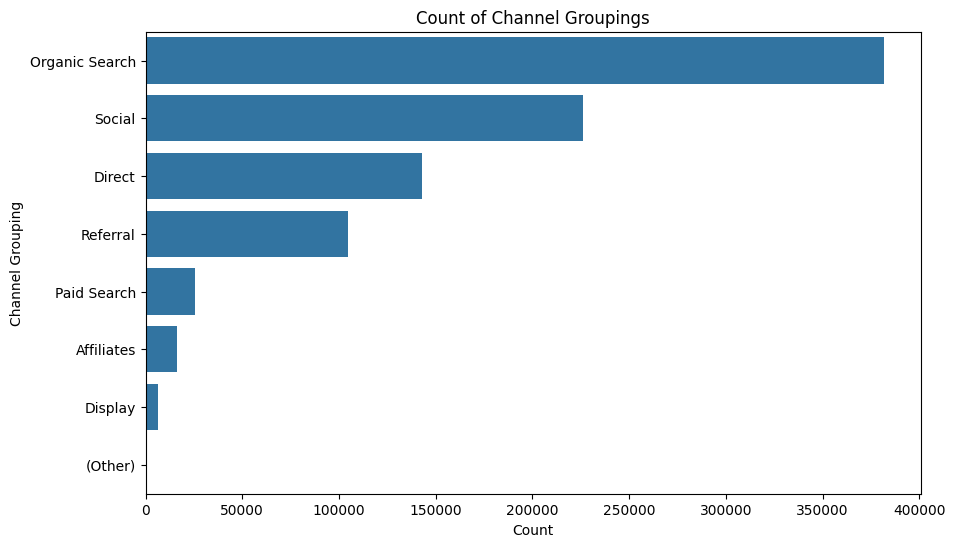

In [32]:
# channelGrouping 값별 빈도수 계산
channel_counts = train_1['channelGrouping'].value_counts()

# 빈도수 기준으로 데이터 정렬
channel_counts_sorted = channel_counts.sort_values(ascending=False)

# 정렬된 데이터를 기반으로 바 그래프 생성
plt.figure(figsize=(10, 6))
sns.countplot(data=train_1, y='channelGrouping', order=channel_counts_sorted.index)
plt.title('Count of Channel Groupings')
plt.xlabel('Count')
plt.ylabel('Channel Grouping')

Text(0, 0.5, 'Device Browser')

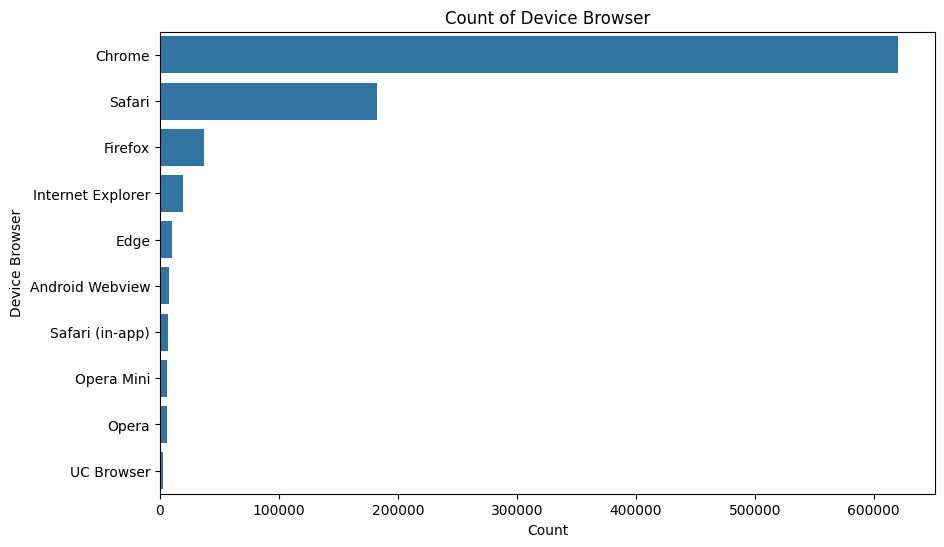

In [33]:
# device_browser 값별 빈도수 계산
channel_counts = train_1['device_browser'].value_counts()

# 빈도수 기준으로 데이터 정렬
channel_counts_sorted = channel_counts.sort_values(ascending=False).head(10)

# 정렬된 데이터를 기반으로 바 그래프 생성
plt.figure(figsize=(10, 6))
sns.countplot(data=train_1, y='device_browser', order=channel_counts_sorted.index)
plt.title('Count of Device Browser')
plt.xlabel('Count')
plt.ylabel('Device Browser')

Text(0, 0.5, 'Operating System')

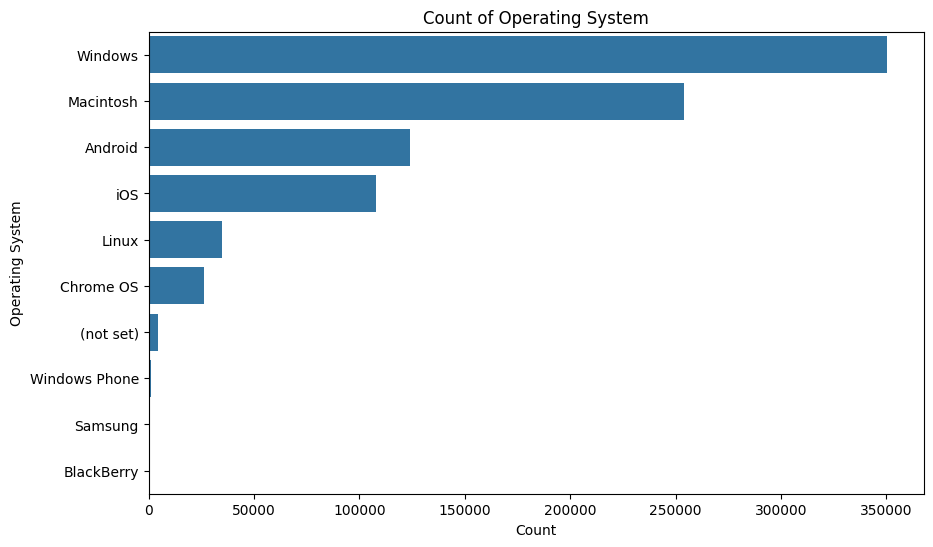

In [34]:
# device_operatingSystem 값별 빈도수 계산
channel_counts = train_1['device_operatingSystem'].value_counts()

# 빈도수 기준으로 데이터 정렬
channel_counts_sorted = channel_counts.sort_values(ascending=False).head(10)

# 정렬된 데이터를 기반으로 바 그래프 생성
plt.figure(figsize=(10, 6))
sns.countplot(data=train_1, y='device_operatingSystem', order=channel_counts_sorted.index)
plt.title('Count of Operating System')
plt.xlabel('Count')
plt.ylabel('Operating System')

Text(0, 0.5, 'Device Category')

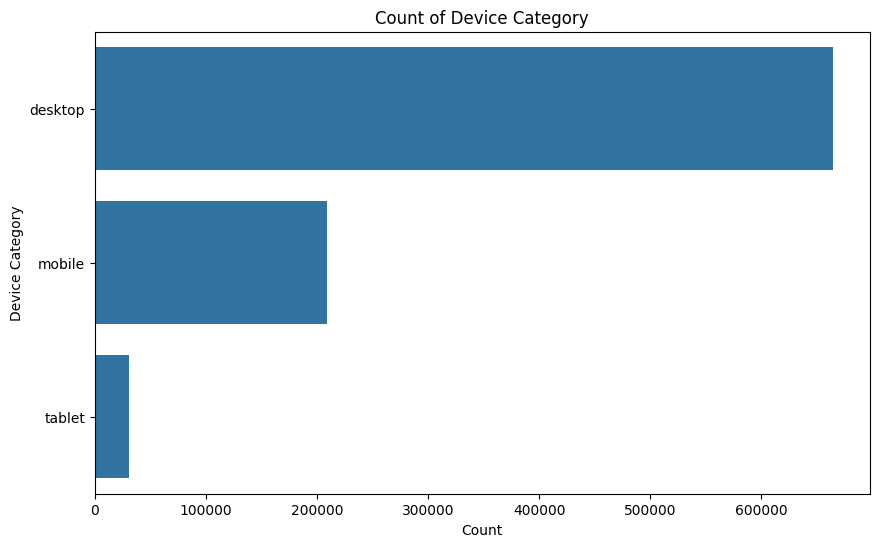

In [35]:
# device_deviceCategory 값별 빈도수 계산
channel_counts = train_1['device_deviceCategory'].value_counts()

# 빈도수 기준으로 데이터 정렬
channel_counts_sorted = channel_counts.sort_values(ascending=False).head(10)

# 정렬된 데이터를 기반으로 바 그래프 생성
plt.figure(figsize=(10, 6))
sns.countplot(data=train_1, y='device_deviceCategory', order=channel_counts_sorted.index)
plt.title('Count of Device Category')
plt.xlabel('Count')
plt.ylabel('Device Category')

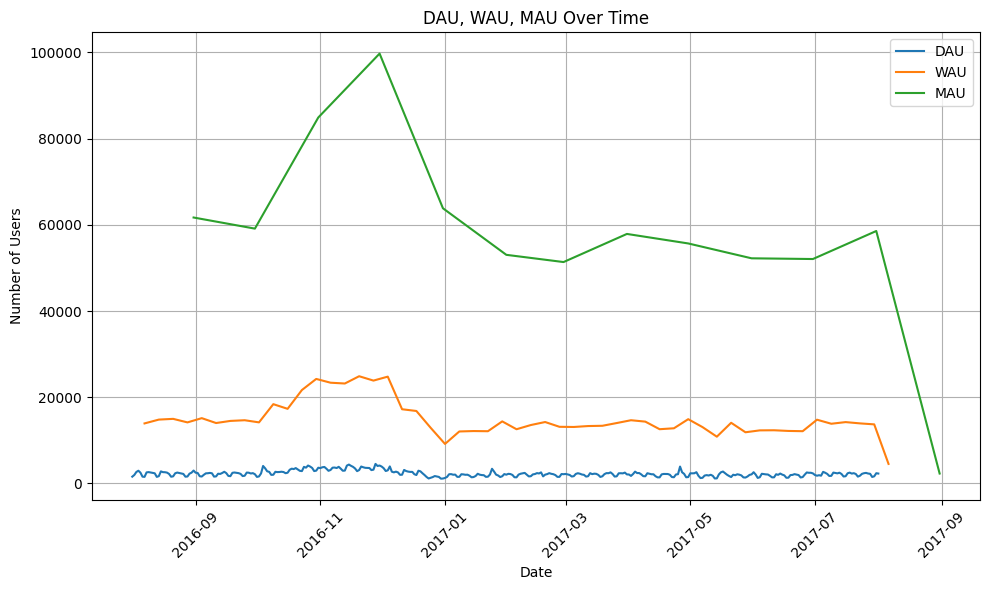

In [37]:
# 일(day), 주(week), 월(month) 그룹별로 고유한 방문자 수 계산
dau = train_1.groupby(train_1['date'])['fullVisitorId'].nunique()
wau = train_1.groupby(train_1['date'].dt.to_period('W'))['fullVisitorId'].nunique()
mau = train_1.groupby(train_1['date'].dt.to_period('M'))['fullVisitorId'].nunique()

# 그래프 그리기
plt.figure(figsize=(10, 6))

# DAU 그래프
plt.plot(dau, label='DAU')

# WAU 그래프
plt.plot(wau, label='WAU')

# MAU 그래프
plt.plot(mau, label='MAU')

plt.title('DAU, WAU, MAU Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Users')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()